# Importing Necessary Library

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from warnings import filterwarnings
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
filterwarnings('ignore')

# Importing Dataset

In [2]:
taxi_data=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

In [3]:
taxi_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.00
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.00
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.00
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.00
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,2023-06-30 22:50:57,2023-06-30 22:22:22,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00
174996,1,2023-06-30 13:03:33,2023-06-30 14:04:57,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75
174997,0,2023-06-29 11:03:32,2023-06-29 12:13:34,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00
174998,1,2023-06-29 19:47:17,2023-06-29 19:08:55,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00


In [4]:
taxi_data.tail(50)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
174950,1,2023-06-29 13:58:51,2023-06-29 13:40:29,1.0,21.73,2.0,N,21,214,Credit Card,0.00,17.127568,6.55,1.0,98.76,2.5,1.75
174951,0,2023-06-30 15:08:27,2023-06-30 16:08:03,1.0,1.10,1.0,N,230,61,Credit Card,5.00,6.054478,0.00,1.0,18.10,2.5,0.00
174952,1,2023-06-28 20:14:34,2023-06-28 19:25:53,1.0,3.47,1.0,N,226,157,Cash,2.50,1.315521,0.00,1.0,27.00,2.5,0.00
174953,0,2023-06-28 18:53:54,2023-06-28 18:48:24,3.0,10.80,1.0,N,113,52,Credit Card,11.75,16.639958,6.55,1.0,76.05,2.5,1.75
174954,1,2023-06-30 18:35:40,2023-06-30 18:30:18,2.0,3.80,1.0,N,41,251,Credit Card,2.50,7.123491,0.00,1.0,34.92,2.5,0.00
174955,1,2023-06-29 10:35:11,2023-06-29 11:17:36,2.0,0.82,1.0,N,57,68,Cash,0.00,1.338299,0.00,1.0,10.50,2.5,0.00
174956,0,2023-06-28 16:08:27,2023-06-28 16:48:06,2.0,0.50,1.0,N,6,234,Credit Card,5.00,4.503789,0.00,1.0,15.00,2.5,0.00
174957,1,2023-06-30 08:39:59,2023-06-30 08:41:04,5.0,0.84,1.0,N,176,215,Credit Card,0.00,4.198094,0.00,1.0,13.80,0.0,0.00
174958,0,2023-06-30 10:30:57,2023-06-30 11:43:19,1.0,1.20,1.0,N,190,23,Cash,2.50,3.154668,0.00,1.0,13.30,2.5,0.00
174959,1,2023-06-29 14:50:19,2023-06-29 14:48:27,1.0,0.08,1.0,N,37,209,Credit Card,0.00,5.990373,0.00,1.0,10.10,2.5,0.00


# Data Understanding

In [5]:
taxi_data.shape

(175000, 17)

In [6]:
taxi_data.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type              object
extra                    float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
Airport_fee              float64
dtype: object

In [7]:
taxi_data.isna().sum()


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [8]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     158652
2.0       7314
5.0       1036
99.0       748
3.0        727
4.0        446
Name: count, dtype: int64

In [9]:
taxi_data['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    167729
Y      1194
Name: count, dtype: int64

In [10]:
taxi_data['payment_type'].value_counts()

payment_type
Credit Card    135257
Cash            30141
Wallet           6077
unknown          2333
UPI              1192
Name: count, dtype: int64

In [11]:
taxi_data['VendorID'].value_counts()

VendorID
1    127340
0     47597
2        63
Name: count, dtype: int64

In [12]:
taxi_data['passenger_count'].value_counts()

passenger_count
1.0    128534
2.0     24316
3.0      6018
4.0      3668
0.0      2818
5.0      1970
6.0      1596
8.0         2
9.0         1
Name: count, dtype: int64

In [13]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [14]:
taxi_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


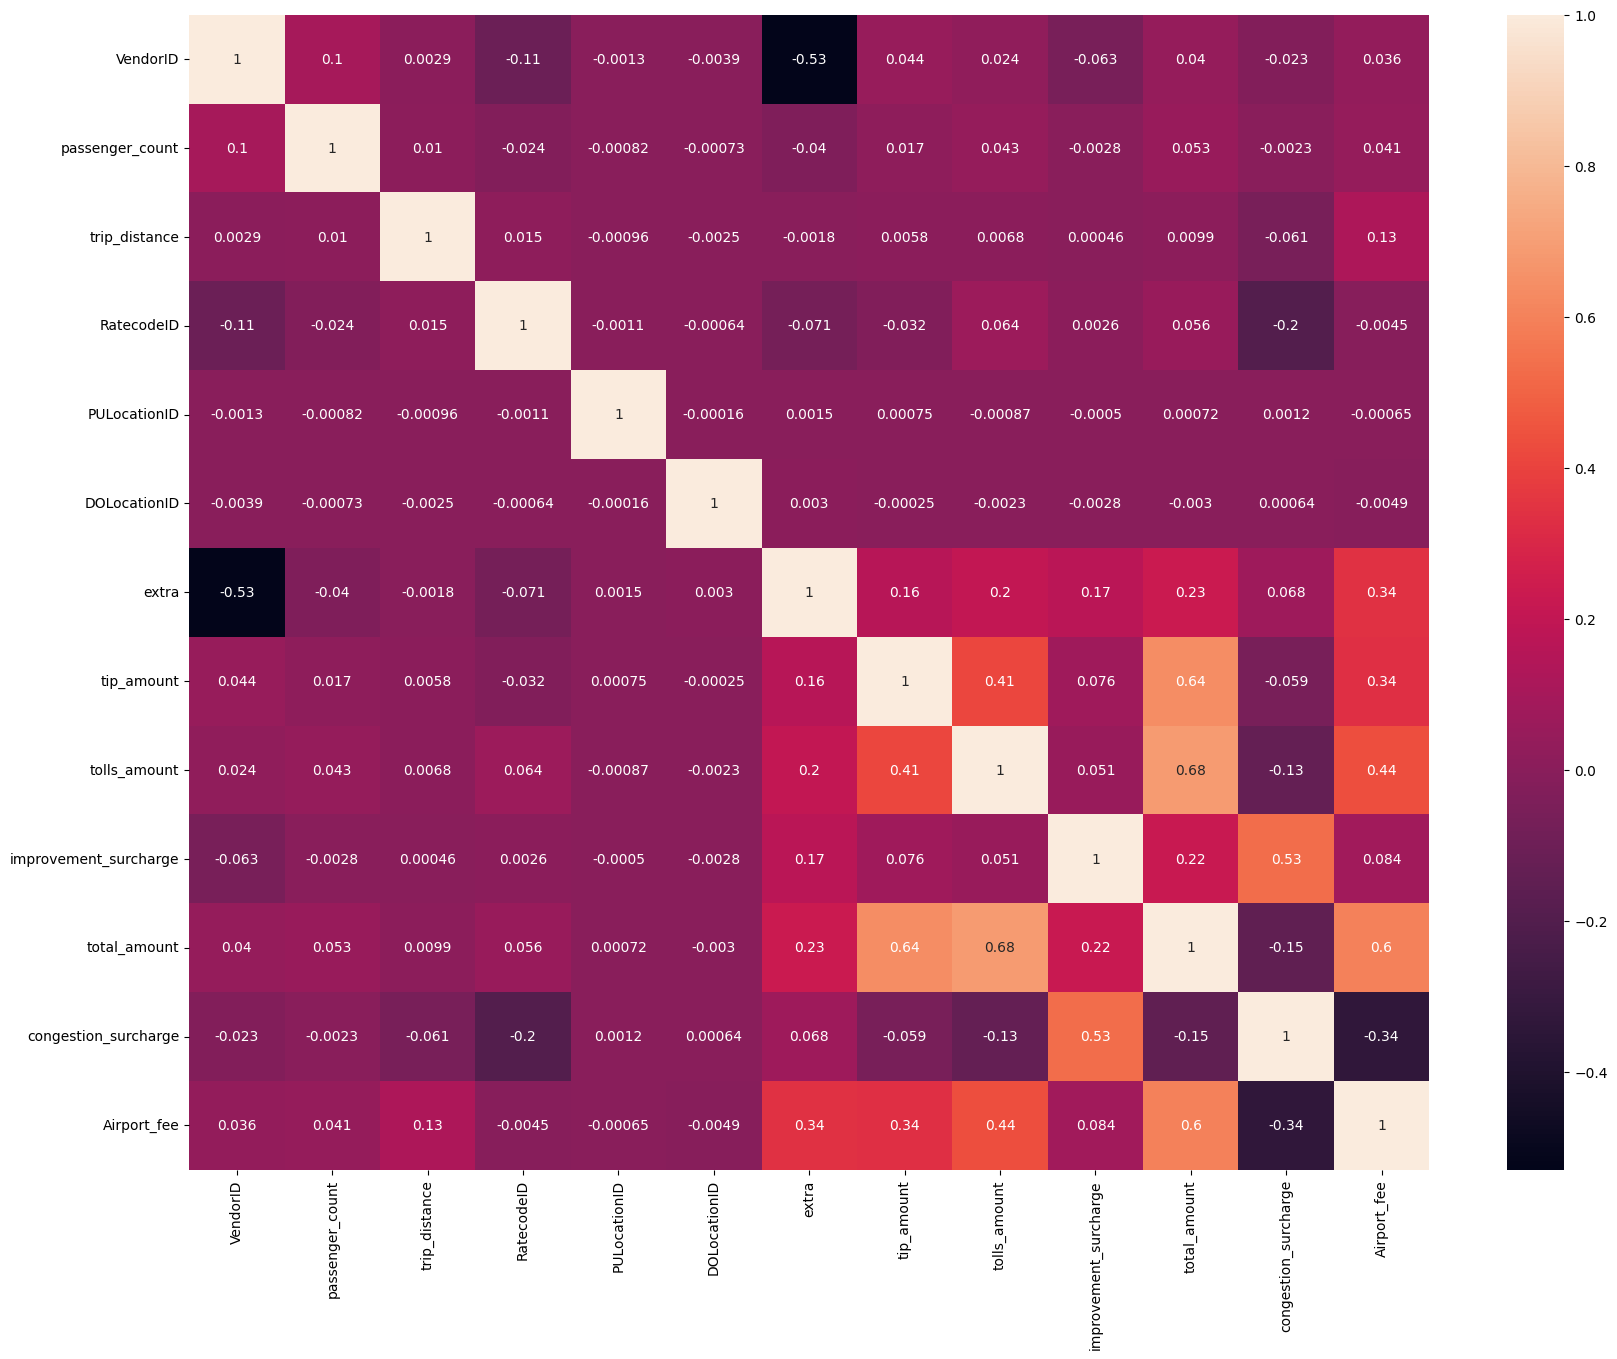

In [15]:
numeric_columns = taxi_data.select_dtypes(include=['number'])


plt.figure(figsize=(20, 15))
sns.heatmap(numeric_columns.corr(), annot=True)
plt.show()

In [16]:
taxi_data[taxi_data['PULocationID']==taxi_data['DOLocationID']]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
27,1,2023-06-29 17:43:29,2023-06-29 18:51:13,2.0,33.95,3.0,N,223,223,Cash,2.5,3.177106,29.0,1.0,194.80,0.0,0.0
422,0,2023-06-29 22:37:21,2023-06-29 22:46:44,NaN,0.00,NaN,NaN,149,149,Wallet,0.0,3.765160,0.0,1.0,31.59,NaN,NaN
728,1,2023-06-29 15:08:21,2023-06-29 16:14:40,1.0,3.09,1.0,N,26,26,Credit Card,0.0,7.110698,0.0,1.0,35.28,2.5,0.0
1252,1,2023-06-29 15:35:19,2023-06-29 17:25:48,1.0,1.58,1.0,N,106,106,Credit Card,2.5,5.979510,0.0,1.0,28.50,2.5,0.0
1460,1,2023-06-30 08:27:07,2023-06-30 09:11:19,1.0,2.70,1.0,N,237,237,Credit Card,0.0,6.646116,0.0,1.0,26.88,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174166,1,2023-06-29 11:03:07,2023-06-29 11:00:11,1.0,1.81,1.0,N,28,28,Credit Card,0.0,7.436511,0.0,1.0,21.84,2.5,0.0
174196,1,2023-06-28 23:53:57,2023-06-28 22:41:39,1.0,1.56,1.0,N,79,79,Credit Card,1.0,4.479095,0.0,1.0,16.44,2.5,0.0
174671,1,2023-06-30 13:34:39,2023-06-30 13:39:27,1.0,0.75,1.0,N,186,186,Credit Card,0.0,6.353968,0.0,1.0,16.30,2.5,0.0
174806,1,2023-06-28 18:18:55,2023-06-28 16:41:32,1.0,1.01,1.0,N,201,201,Credit Card,2.5,6.123848,0.0,1.0,17.10,2.5,0.0


# DATA VISUALIZATION

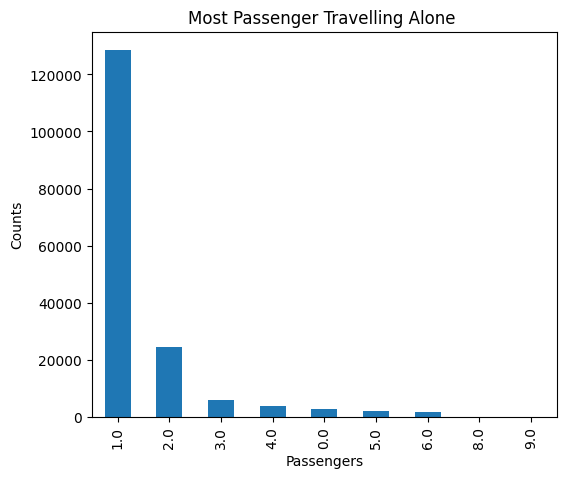

In [17]:
plt.figure(figsize=(6,5))
taxi_data['passenger_count'].value_counts().plot.bar()
plt.xlabel('Passengers')
plt.ylabel('Counts')
plt.title('Most Passenger Travelling Alone ')
plt.show()

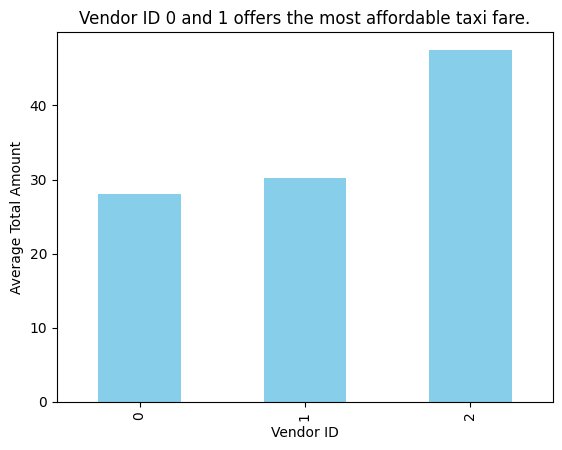

In [18]:
average_fare_from_each_vendor_id=taxi_data.groupby('VendorID')['total_amount'].mean()
average_fare_from_each_vendor_id.plot(kind='bar', color='skyblue')
plt.title('Vendor ID 0 and 1 offers the most affordable taxi fare.')
plt.xlabel('Vendor ID')
plt.ylabel('Average Total Amount')
plt.show()

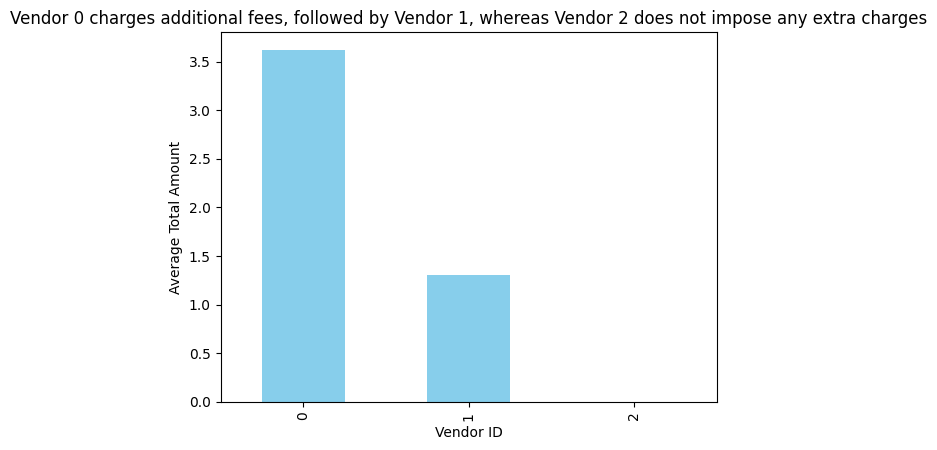

In [19]:
average_fare_from_each_vendor_id=taxi_data.groupby('VendorID')['extra'].mean()
average_fare_from_each_vendor_id.plot(kind='bar', color='skyblue')
plt.title('Vendor 0 charges additional fees, followed by Vendor 1, whereas Vendor 2 does not impose any extra charges')
plt.xlabel('Vendor ID')
plt.ylabel('Average Total Amount')
plt.show()

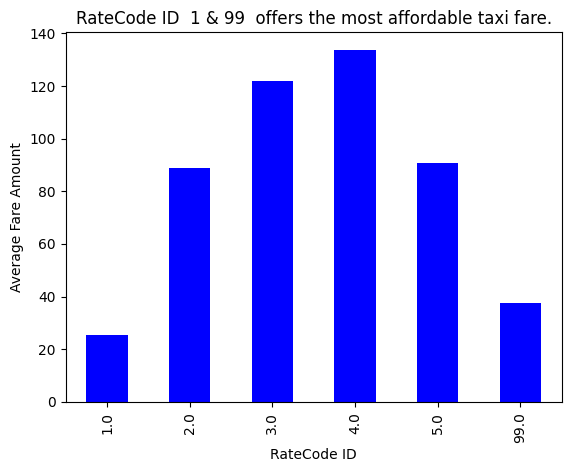

In [20]:
average_fare_from_each_RateCodeID_id=taxi_data.groupby('RatecodeID')['total_amount'].mean()
average_fare_from_each_RateCodeID_id.plot(kind='bar', color='blue')
plt.title('RateCode ID  1 & 99  offers the most affordable taxi fare.')
plt.xlabel('RateCode ID')
plt.ylabel('Average Fare Amount')
 
plt.show()

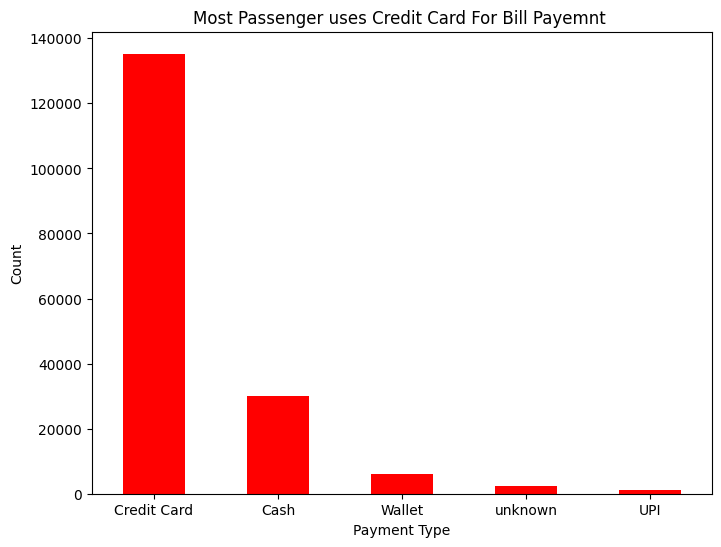

In [21]:
payment_type_counts = taxi_data['payment_type'].value_counts()

plt.figure(figsize=(8, 6))
payment_type_counts.plot(kind='bar', color='red')
plt.title('Most Passenger uses Credit Card For Bill Payemnt ')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.show()

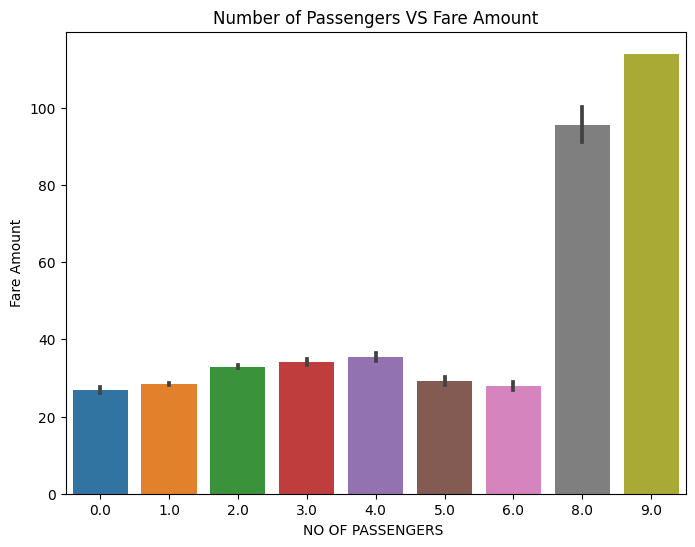

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(x='passenger_count',y='total_amount',data =taxi_data )
plt.xlabel('NO OF PASSENGERS ')
plt.ylabel('Fare Amount')
plt.title('Number of Passengers VS Fare Amount')
plt.show()

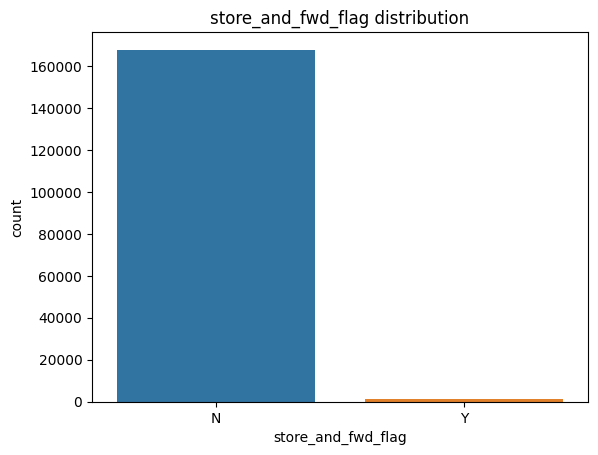

In [23]:

sns.countplot(x='store_and_fwd_flag', data = taxi_data)
plt.title('store_and_fwd_flag distribution')
plt.show()

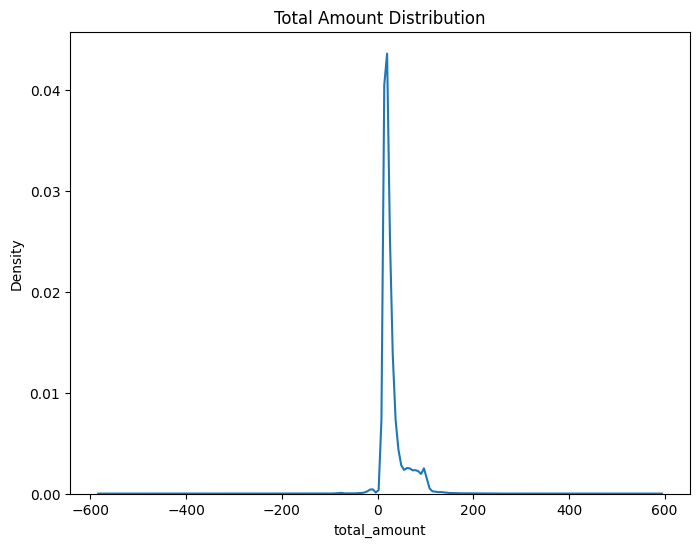

In [24]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=taxi_data,x='total_amount')
plt.title('Total Amount Distribution')
plt.show()




# Some Insights From Data Understanding And Data Vislualization

> The dataset contains 4 categorical columns and 13 numerical columns.
> Its shape is (175,000, 17).
> There are null values in 5 columns.

**Passenger Count Distribution:**

The majority of passengers (represented by the passenger count) is 1, suggesting that most passengers travel alone.


**Vendor ID and Fare Insights:**

Vendor IDs 1 and 2 offer affordable taxi fares, while Vendor ID 3 is notably the most expensive.
Vendor ID 3 does not impose extra charges, unlike Vendor IDs 1 and 2.


**Payment Preferences:**

Most passengers prefer using credit cards for taxi ride payments.


**RateCode ID and Fare Affordability:**

RateCode IDs 1 and 99 provide the most affordable taxi fares.


**Impact of Passenger Count on Fare:**

As the number of passengers increases to 8 or more, there is a significant spike in fare prices compared to counts below 8.


**Kernel Density Plot of Total Amount:**

The plot reveals a symmetric distribution with the maximum total amount falling between 0 and 100.
Heatmap 

**Correlation Matrix:**

The correlation matrix indicates weak correlations between pairs of variables in the dataset.

# Data Preprocessing

In [25]:
fare_data=taxi_data.drop([ 'tpep_pickup_datetime', 'tpep_dropoff_datetime' ], axis=1)


In [26]:
fare_data

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.00
1,0,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.00
2,1,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.00
3,0,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.00
4,1,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00
174996,1,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75
174997,0,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00
174998,1,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00


In [27]:
fare_data[fare_data['passenger_count']==2.0]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
24,1,2.0,0.47,1.0,N,34,224,Credit Card,2.5,2.403976,0.0,1.0,13.92,2.5,0.0
25,0,2.0,4.30,1.0,N,25,225,Cash,2.5,2.898170,0.0,1.0,27.30,2.5,0.0
27,1,2.0,33.95,3.0,N,223,223,Cash,2.5,3.177106,29.0,1.0,194.80,0.0,0.0
34,1,2.0,3.29,1.0,N,192,113,Credit Card,0.0,2.684438,0.0,1.0,29.30,2.5,0.0
37,0,2.0,1.60,1.0,N,93,254,Cash,5.0,2.282790,0.0,1.0,17.20,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174962,1,2.0,1.76,1.0,N,92,75,Credit Card,0.0,8.868153,0.0,1.0,23.52,2.5,0.0
174969,1,2.0,2.66,1.0,N,176,177,Credit Card,2.5,7.361504,0.0,1.0,27.36,2.5,0.0
174984,1,2.0,2.69,1.0,N,100,225,Cash,2.5,4.681097,0.0,1.0,24.20,2.5,0.0
174989,1,2.0,2.47,1.0,N,167,170,Credit Card,2.5,7.028377,0.0,1.0,34.08,2.5,0.0


In [28]:
fare_data2=fare_data.drop(['total_amount'],axis=1)


In [29]:
fare_data2

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,2.5,0.00
1,0,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,2.5,0.00
2,1,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,2.5,0.00
3,0,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,2.5,0.00
4,1,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,0.0,1.0,2.5,0.00
174996,1,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,0.0,1.0,2.5,1.75
174997,0,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,0.0,1.0,2.5,0.00
174998,1,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,0.0,1.0,2.5,0.00


In [30]:
# Define a numerical pipeline to handle missing values with median and scale features
num_pipline=ColumnTransformer(transformers=[('impute',SimpleImputer(strategy='median'),[0,1,2,3,5,6,8,9,10,11,12,13])])
scale_pipe=Pipeline(steps=[('numeric',num_pipline),
                          ('scale',StandardScaler())])
cat_pipeline=ColumnTransformer(transformers=[('cat',OrdinalEncoder(),[4,7])])
complete_pipe=FeatureUnion([('numeric',scale_pipe),('cat',cat_pipeline)])
pipe=Pipeline(steps=[('cp',complete_pipe),
             ('imputer',SimpleImputer())])
# Create the final preprocessing pipeline including imputation
transformed_fare_data = pipe.fit_transform(fare_data2)
# Define column names for the transformed data
column_names = ['VendorID','passenger_count', 'trip_distance', 'RatecodeID','PULocationID','DOLocationID','extra', 'tip_amount', 'tolls_amount','improvement_surcharge','congestion_surcharge','Airport_fee','store_and_fwd_flag','payment_type']

# Creating a DataFrame
transformed_fare_data = pd.DataFrame(transformed_fare_data, columns=column_names)

In [31]:
transformed_fare_data

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,store_and_fwd_flag,payment_type
0,0.60956,-0.393181,-0.007611,-0.078158,-0.166915,-1.623543,0.291434,0.225142,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0
1,-1.63458,-0.393181,-0.006193,-0.078158,-1.545798,1.080143,0.804651,-0.013034,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0
2,0.60956,-0.393181,-0.010117,-0.078158,0.450299,1.185141,-0.991610,-0.437221,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0
3,-1.63458,-0.393181,-0.012016,-0.078158,-0.061857,1.395136,0.291434,0.061504,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0
4,0.60956,1.884429,-0.010244,-0.078158,0.923059,-1.059181,-0.478392,-0.294551,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,0.60956,1.884429,-0.004294,-0.078158,0.187655,0.450158,-0.478392,0.564975,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0
174996,0.60956,-0.393181,0.010872,-0.078158,0.279580,0.765151,1.574478,-1.267501,-0.27781,0.102183,0.302957,3.169049,0.0,0.0
174997,-1.63458,-0.393181,-0.006952,-0.078158,0.463432,-0.350448,0.291434,-0.408201,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0
174998,0.60956,-0.393181,-0.001104,-0.078158,1.408951,-0.429196,0.291434,0.943927,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0


In [32]:
transformed_fare_data.isna().sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
congestion_surcharge     0
Airport_fee              0
store_and_fwd_flag       0
payment_type             0
dtype: int64

# Model Building

In [33]:
x=transformed_fare_data
y=fare_data[['total_amount']]

In [34]:
x

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,store_and_fwd_flag,payment_type
0,0.60956,-0.393181,-0.007611,-0.078158,-0.166915,-1.623543,0.291434,0.225142,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0
1,-1.63458,-0.393181,-0.006193,-0.078158,-1.545798,1.080143,0.804651,-0.013034,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0
2,0.60956,-0.393181,-0.010117,-0.078158,0.450299,1.185141,-0.991610,-0.437221,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0
3,-1.63458,-0.393181,-0.012016,-0.078158,-0.061857,1.395136,0.291434,0.061504,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0
4,0.60956,1.884429,-0.010244,-0.078158,0.923059,-1.059181,-0.478392,-0.294551,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,0.60956,1.884429,-0.004294,-0.078158,0.187655,0.450158,-0.478392,0.564975,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0
174996,0.60956,-0.393181,0.010872,-0.078158,0.279580,0.765151,1.574478,-1.267501,-0.27781,0.102183,0.302957,3.169049,0.0,0.0
174997,-1.63458,-0.393181,-0.006952,-0.078158,0.463432,-0.350448,0.291434,-0.408201,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0
174998,0.60956,-0.393181,-0.001104,-0.078158,1.408951,-0.429196,0.291434,0.943927,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0


In [35]:
x.isna().sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
congestion_surcharge     0
Airport_fee              0
store_and_fwd_flag       0
payment_type             0
dtype: int64

In [36]:
y.head(50)

,total_amount
0,20.64
1,25.55
2,17.64
3,12.80
4,18.00
5,44.70
6,18.20
7,13.70
8,35.60
9,23.10


In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=24)

In [38]:
xtrain.shape,ytrain.shape

((122500, 14), (122500, 1))

In [39]:
xtrain

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,store_and_fwd_flag,payment_type
46792,0.60956,-0.393181,0.002213,-0.078158,1.435216,-1.216678,-0.478392,1.701703,5.198365,0.102183,-2.798024,-0.304284,0.0,1.0
68269,0.60956,-0.393181,0.017050,-0.078158,-1.335683,-1.426673,-0.991610,2.341118,-0.277810,0.102183,-2.798024,3.169049,0.0,1.0
130513,-1.63458,-0.393181,-0.001382,-0.078158,1.080646,-0.678565,0.804651,1.095684,-0.277810,0.102183,0.302957,-0.304284,0.0,1.0
30180,-1.63458,-0.393181,-0.011256,-0.078158,-0.849791,-0.074829,1.574478,0.296280,-0.277810,0.102183,0.302957,-0.304284,0.0,1.0
133696,0.60956,-0.393181,-0.012953,0.078062,-1.532666,-0.901685,-0.991610,-1.221604,-0.277810,0.102183,-2.798024,3.169049,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145412,0.60956,-0.393181,0.029405,0.078062,-1.480137,-1.662917,-0.991610,-0.837143,2.535441,0.102183,0.302957,-0.304284,0.0,0.0
143483,-1.63458,-0.393181,-0.010750,-0.078158,-0.705336,-1.584169,1.574478,0.155478,-0.277810,0.102183,0.302957,-0.304284,0.0,1.0
6500,0.60956,-0.393181,0.014062,-0.078158,1.251365,1.473884,1.574478,2.134014,2.535441,0.102183,0.302957,3.169049,0.0,1.0
152705,0.60956,4.162040,-0.004699,-0.078158,1.080646,0.620779,-0.991610,0.168636,-0.277810,0.102183,0.302957,-0.304284,0.0,1.0


In [40]:
xtest

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,store_and_fwd_flag,payment_type
111551,0.60956,4.162040,-0.003889,-0.078158,-0.547750,0.135166,-0.991610,-0.303342,-0.27781,0.102183,0.302957,-0.304284,0.000000,0.0
413,-1.63458,-0.393181,-0.006952,-0.078158,-1.046774,0.266412,0.804651,0.499236,-0.27781,0.102183,0.302957,-0.304284,0.000000,1.0
96492,0.60956,4.162040,-0.010497,-0.078158,-1.191228,0.752026,-0.991610,0.233934,-0.27781,0.102183,0.302957,-0.304284,0.000000,1.0
79788,-1.63458,0.745624,0.000643,-0.078158,-1.335683,-0.455445,-0.478392,-0.046124,-0.27781,0.102183,-2.798024,-0.304284,0.000000,1.0
47053,0.60956,-0.393181,-0.011307,-0.078158,-1.112435,0.542031,0.291434,-0.984386,-0.27781,0.102183,0.302957,-0.304284,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128774,0.60956,0.745624,-0.011332,-0.078158,-1.427608,0.358285,-0.478392,-0.545113,-0.27781,0.102183,0.302957,-0.304284,0.000000,1.0
87854,0.60956,-0.393181,-0.009155,-0.078158,-0.915452,-0.849186,-0.991610,-0.264989,-0.27781,0.102183,0.302957,-0.304284,0.007068,3.0
66146,-1.63458,-0.393181,-0.013029,-0.078158,-0.915452,1.027644,-0.991610,-0.416436,-0.27781,0.102183,-2.798024,-0.304284,0.000000,4.0
135432,0.60956,4.162040,-0.009433,-0.078158,-1.598327,0.620779,-0.478392,-1.059432,-0.27781,0.102183,0.302957,-0.304284,0.000000,1.0


In [41]:
ytrain

,total_amount
46792,54.06
68269,62.06
130513,34.50
30180,21.45
133696,73.25
...,...
145412,80.55
143483,18.95
6500,81.13
152705,29.26


In [42]:
xtest.shape,ytest.shape

((52500, 14), (52500, 1))

# Feature Selection On Training Data

In [43]:
def svv(xtrain,xtest,ytrain,ytest):
    svv_cl=XGBRegressor()
    svv_cl.fit(xtrain,ytrain)
    ypred2=svv_cl.predict(xtest)
    print('R2 Score XGBOOST:',r2_score(ytest,ypred2))
    return 'R2 Score XGBOOST:',r2_score(ytest,ypred2)

In [44]:
def rr(xtrain,xtest,ytrain,ytest):
    svv_cl=RandomForestRegressor(max_depth=17)
    svv_cl.fit(xtrain,ytrain)
    ypred2=svv_cl.predict(xtest)
    print('R2 Score RANDOMFOREST:',r2_score(ytest,ypred2))
    return 'R2 Score RANDOMFOREST:',r2_score(ytest,ypred2)

In [45]:
def dd(xtrain,xtest,ytrain,ytest):
    svv_cl=DecisionTreeRegressor(max_depth=11)
    svv_cl.fit(xtrain,ytrain)
    ypred2=svv_cl.predict(xtest)
    print('R2 Score DECISION TREE:',r2_score(ytest,ypred2))
    return 'R2 Score DESCISION TREE:',r2_score(ytest,ypred2)

In [46]:
for i in range(1,14):
    rfe=RFE(estimator=LGBMRegressor(),n_features_to_select=i)
    rfe.fit(xtrain,ytrain)
    rfe_train1=rfe.transform(xtrain)
    rfe_test1=rfe.transform(xtest)
    print('no of features-',i)
    svv(rfe_train1,rfe_test1,ytrain,ytest)
    rr(rfe_train1,rfe_test1,ytrain,ytest)
    dd(rfe_train1,rfe_test1,ytrain,ytest)
    print('==========================================')

no of features- 1
R2 Score XGBOOST: 0.495109503831234
R2 Score RANDOMFOREST: 0.48378644865214937
R2 Score DECISION TREE: 0.48637594572955134
no of features- 2
R2 Score XGBOOST: 0.7418552732068143
R2 Score RANDOMFOREST: 0.7714232806818622
R2 Score DECISION TREE: 0.6742469710134541
no of features- 3
R2 Score XGBOOST: 0.8650802706032721
R2 Score RANDOMFOREST: 0.8641554401624206
R2 Score DECISION TREE: 0.8520723592713892
no of features- 4
R2 Score XGBOOST: 0.862381763614115
R2 Score RANDOMFOREST: 0.8655916793076728
R2 Score DECISION TREE: 0.8396145381060672
no of features- 5
R2 Score XGBOOST: 0.8812670418601262
R2 Score RANDOMFOREST: 0.8875053051211583
R2 Score DECISION TREE: 0.8776225388814038
no of features- 6
R2 Score XGBOOST: 0.9056039134788506
R2 Score RANDOMFOREST: 0.9100154547013612
R2 Score DECISION TREE: 0.8988569309893006
no of features- 7
R2 Score XGBOOST: 0.9075235730206103
R2 Score RANDOMFOREST: 0.9124566582137703
R2 Score DECISION TREE: 0.8903119285611469
no of features- 8
R2

##### From the above, it's clear that every feature holds significance for our model.

## Basline Model

In [47]:
lr=LinearRegression()

In [48]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [49]:
ytrain_pred_lr=lr.predict(xtrain)

In [50]:
print(r2_score(ytrain,ytrain_pred_lr))

0.7288426691869264


In [51]:
ytest_pred_lr=lr.predict(xtest)

In [52]:
print(r2_score(ytest,ytest_pred_lr))

0.6979823074402087


In [53]:
cross_val_scores = cross_val_score(lr, x, y, cv=5, scoring='r2')

In [54]:
cross_val_scores.mean(),cross_val_scores.std()

(0.7188017177535968, 0.012966709822949939)

# Model Training

### 1 Random Forest

In [55]:
lin=RandomForestRegressor(n_estimators=100,max_depth=17,random_state=12)

######  1.1 Model Training

In [56]:
lin.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=17, random_state=12)

In [57]:
ytrain_pred=lin.predict(xtrain)

In [58]:
print(r2_score(ytrain,ytrain_pred))

0.9824086606691678


In [59]:
print(mean_absolute_error(ytrain,ytrain_pred))

1.9957300619937939


##### 1.2 Model testing

In [60]:
ytest_pred=lin.predict(xtest)

In [61]:
print(r2_score(ytest,ytest_pred))

0.9366237448457384


In [62]:
print(mean_absolute_error(ytest,ytest_pred))

2.737322510195987


### 2 XGBOOST

In [63]:
xgb=XGBRegressor(n_estimators=500 ,random_state=15)

##### 2.1 Model Training

In [64]:
xgb.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=15, ...)

In [65]:
y_pred_train_xgb=xgb.predict(xtrain)

In [66]:
r2_score(ytrain,y_pred_train_xgb)

0.9861485886082753

##### 2.2 Model Testing

In [67]:
y_pred_test_xgb=xgb.predict(xtest)

In [68]:
r2_score(ytest,y_pred_test_xgb)

0.9375607874425954

In [69]:
print(mean_absolute_error(ytest,y_pred_test_xgb))

2.7576888831110145


## 3 LGBOOST

In [70]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 8, 10, 12],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create the LightGBM regressor
lgb_reg = LGBMRegressor()

# Initialize the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgb_reg,
    param_distributions=param_dist,
    n_iter=50,  # Reduce the number of iterations
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    cv=5,
    n_jobs=-1,  # Utilize parallel processing if available
    verbose=1
)

# Perform the random search on your data
random_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [6, 8, 10, 12],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='neg_mean_squared_error', verbose=1)

In [71]:
best_params = random_search.best_params_
best_score = random_search.best_score_

In [72]:
best_params

{'subsample': 0.9,
 'n_estimators': 200,
 'max_depth': 8,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8}

In [73]:
best_score

-41.805251320931816

##### 3.1 Model Traing

In [74]:
lgbm=LGBMRegressor(subsample=1.0,n_estimators=200,max_depth=12,learning_rate=0.1,colsample_bytree=0.8)

In [75]:
lgbm.fit(xtrain,ytrain)

LGBMRegressor(colsample_bytree=0.8, max_depth=12, n_estimators=200)

In [76]:
y_pred_train_lgbm=lgbm.predict(xtrain)

In [77]:
r2_score(ytrain,y_pred_train_lgbm)

0.9619172012336038

##### 3.2 Model Testing

In [78]:
y_pred_test_lgbm=lgbm.predict(xtest)

In [79]:
r2_score(ytest,y_pred_test_lgbm)

0.9154454214058707

In [80]:
print(mean_absolute_error(ytest,y_pred_test_lgbm))

2.8317356724056415


## 4 Decision Tree

In [81]:
dt = DecisionTreeRegressor()

# Define the hyperparameter grid with fewer values and iterations
param_dist = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [0.1, 0.2, 0.3, 0.4],
    'min_samples_leaf': [0.01, 0.05, 0.1],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Create the randomized search with fewer iterations
random_search = RandomizedSearchCV(
    dt, param_distributions=param_dist, n_iter=20,
    scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1, random_state=42
)

# Fit the randomized search to your data
random_search.fit(transformed_fare_data,y )

# Print the best hyperparameters and score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score (Negative MSE): ", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters:  {'min_samples_split': 0.2, 'min_samples_leaf': 0.01, 'max_features': 'auto', 'max_depth': 7}
Best Score (Negative MSE):  -217.54292781882768


In [82]:
ds=DecisionTreeRegressor(max_depth=11)

In [83]:
ds.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=11)

In [84]:
ypred_train_ds=ds.predict(xtrain)

In [85]:
r2_score(ytrain,ypred_train_ds)

0.9618702400327515

In [86]:
ypred_test_ds=ds.predict(xtest)

In [87]:
r2_score(ytest,ypred_test_ds)

0.9217301919845466

In [88]:
print(mean_absolute_error(ytest,ypred_test_ds))

3.161101219088342


### 5.KNN 

In [89]:
knn=KNeighborsRegressor(n_neighbors=3)

In [90]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=3)

In [91]:
ypredknn_train=knn.predict(xtrain)

In [92]:
r2_score(ytrain,ypredknn_train)

0.8778834545620396

In [93]:
ypredknn_test=knn.predict(xtest)

In [94]:
r2_score(ytest,ypredknn_test)

0.7378172434546568

## 6 SVM

In [95]:
sv=SVR(kernel='linear')

##### 6.1 Model Training

In [96]:
sv.fit(xtrain,ytrain)

SVR(kernel='linear')

In [97]:
ytrainpred_svr=sv.predict(xtrain)

In [98]:
r2_score(ytrain,ytrainpred_svr)

0.4661262401445888

##### 6.2 Model Testing

In [99]:
ytestpred_svr=sv.predict(xtest)

In [100]:
r2_score(ytest,ytestpred_svr)

0.43210051864215626

### Model Performance Comparsion 

In [101]:
model_names = ["Random Forest", "XGBoost", "LightGBM", "Decision Tree","KNN","SVM"]
r2_scores = [r2_score(ytest, ytest_pred), r2_score(ytest, y_pred_test_xgb),
            r2_score(ytest, y_pred_test_lgbm), r2_score(ytest, ypred_test_ds),r2_score(ytest,ypredknn_test),r2_score(ytest,ytestpred_svr)]
mae_scores = [mean_absolute_error(ytest, ytest_pred), mean_absolute_error(ytest, y_pred_test_xgb),
             mean_absolute_error(ytest, y_pred_test_lgbm), mean_absolute_error(ytest, ypred_test_ds),mean_absolute_error(ytest,ypredknn_test),mean_absolute_error(ytest,ytestpred_svr)]

# Create a DataFrame
results_df = pd.DataFrame({'Model': model_names, 'R2 Score': r2_scores, 'Mean Absolute Error': mae_scores})

print(results_df)


           Model  R2 Score  Mean Absolute Error
0  Random Forest  0.936624             2.737323
1        XGBoost  0.937561             2.757689
2       LightGBM  0.915445             2.831736
3  Decision Tree  0.921730             3.161101
4            KNN  0.737817             7.442351
5            SVM  0.432101             7.835717



# The differences in performance scores (R2 score and Mean Absolute Error) among the various models could be attributed to several factors, including the characteristics of the dataset and the inherent properties of each model. Here are potential reasons for differences in scores:



**Model Complexity:**

Ensemble models like Random Forest, XGBoost, and LightGBM are capable of capturing complex relationships in the data by combining multiple weak learners (trees). They often outperform simpler models like Decision Trees, KNN, and SVM in capturing intricate patterns.


**Feature Engineering:**

The effectiveness of the models may be influenced by the quality of feature engineering. Ensemble models can handle a wide range of features and may benefit from well-engineered input variables.


**Hyperparameter Tuning:**



The performance of machine learning models is highly sensitive to hyperparameter settings. Random Forest, XGBoost, and LightGBM typically have more hyperparameters to tune. The superior performance of Random Forest and XGBoost could be due to effective hyperparameter tuning.


**Handling Non-linearity:**

Ensemble models are generally good at capturing non-linear relationships in the data. If the underlying patterns in the dataset are complex and non-linear, ensemble models may have an advantage over simpler models like linear SVM.


**Robustness to Noisy Data:**

Ensemble methods are often robust to noisy or irrelevant features. If the dataset contains outliers or noisy information, ensemble models might handle it better than models like KNN or SVM.


**Overfitting:**

Decision Trees, if not properly pruned, can be prone to overfitting, capturing noise in the training data. Ensemble methods can mitigate this by aggregating the predictions of multiple trees.

**Data Scaling and Normalization:**

KNN and SVM can be sensitive to the scale of features. If the features are not appropriately scaled, it can impact the performance of these models. Ensemble models are generally less sensitive to feature scaling.


**Kernel Selection (SVM):**

The choice of kernel in SVM can significantly affect its performance. If the chosen kernel is not suitable for the underlying structure of the data, it may result in lower predictive accuracy.

# Model Testing On Test.CSV

In [102]:
test_data=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

In [103]:
test_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.00
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.00
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.00
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.00
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,2023-06-29 17:41:59,2023-06-29 18:30:36,1.0,0.61,1.0,N,48,72,Credit Card,2.5,4.043482,0.0,1.0,2.5,0.00
49996,1,2023-06-30 01:25:25,2023-06-30 01:10:40,1.0,5.02,1.0,N,57,103,Cash,1.0,2.895882,0.0,1.0,0.0,1.75
49997,1,2023-06-30 22:28:44,2023-06-30 21:49:37,1.0,1.92,1.0,N,150,78,Credit Card,1.0,5.636590,0.0,1.0,2.5,0.00
49998,0,2023-06-30 02:37:18,2023-06-30 02:10:33,1.0,5.40,1.0,N,4,154,Credit Card,3.5,7.293144,0.0,1.0,2.5,0.00


In [104]:
test_data1=test_data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime' ], axis=1)


In [105]:
test_data1

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.00
1,1,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.00
2,1,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.00
3,0,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.00
4,1,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1.0,0.61,1.0,N,48,72,Credit Card,2.5,4.043482,0.0,1.0,2.5,0.00
49996,1,1.0,5.02,1.0,N,57,103,Cash,1.0,2.895882,0.0,1.0,0.0,1.75
49997,1,1.0,1.92,1.0,N,150,78,Credit Card,1.0,5.636590,0.0,1.0,2.5,0.00
49998,0,1.0,5.40,1.0,N,4,154,Credit Card,3.5,7.293144,0.0,1.0,2.5,0.00


In [106]:
transformed_data =pipe.transform(test_data1)


# Create a DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=column_names)

In [107]:
transformed_df

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,store_and_fwd_flag,payment_type
0,0.60956,-0.393181,-0.000496,-0.078158,-1.480137,-1.702291,-0.478392,-0.012988,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0
1,0.60956,-0.393181,-0.007712,-0.078158,-1.624592,-0.678565,0.291434,0.013831,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0
2,0.60956,-0.393181,-0.010623,-0.078158,-0.534617,-0.560443,0.291434,-0.464912,-0.27781,0.102183,0.302957,-0.304284,0.0,0.0
3,-1.63458,-0.393181,-0.011003,-0.078158,-1.493269,-0.402947,0.804651,0.154385,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0
4,0.60956,-0.393181,-0.002876,-0.078158,-0.022461,1.263889,-0.991610,-1.010352,-0.27781,0.102183,-2.798024,-0.304284,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.60956,-0.393181,-0.011484,-0.078158,-1.112435,-0.796687,0.291434,-0.451984,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0
49996,0.60956,-0.393181,-0.000319,-0.078158,-0.994245,-0.389822,-0.478392,-0.700876,-0.27781,0.102183,-2.798024,3.169049,0.0,0.0
49997,0.60956,-0.393181,-0.008168,-0.078158,0.227052,-0.717939,-0.478392,-0.106468,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0
49998,-1.63458,-0.393181,0.000643,-0.078158,-1.690253,0.279537,0.804651,0.252807,-0.27781,0.102183,0.302957,-0.304284,0.0,1.0


In [108]:
transformed_df.isna().sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
congestion_surcharge     0
Airport_fee              0
store_and_fwd_flag       0
payment_type             0
dtype: int64

####  Testing Random Forest Model On Test data

In [109]:
yfinal_pred=lin.predict(transformed_df)

In [110]:
yfinal_pred

array([35.75648783, 26.66131842, 15.85650211, ..., 20.39773271,
       38.31629318, 17.89967784])

In [111]:
submission_df = pd.DataFrame({'ID': range(1, len(yfinal_pred) + 1), 'total_amount': yfinal_pred})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

#### Testing  XGBOOST  Model On Test data

In [112]:
yfinal_pred_xgb=xgb.predict(transformed_df)

In [113]:
yfinal_pred_xgb

array([33.802807, 25.70746 , 15.270814, ..., 20.081459, 37.176743,
       17.125805], dtype=float32)

In [114]:
 submission_df = pd.DataFrame({'ID': range(1, len(yfinal_pred_xgb) + 1), 'total_amount': yfinal_pred_xgb})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission1.csv', index=False)